### Preparing the data for MBA

In [ ]:
# Import the dataset
import pandas as pd
movies = pd.read_csv("movies.csv")

movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
4446,4541,"Serpent and the Rainbow, The (1988)",Horror
4447,4542,Shakedown (1988),Action
4448,4543,Shoot to Kill (1988),Action|Adventure
4449,4544,Short Circuit 2 (1988),Comedy|Sci-Fi


In [ ]:
# Split transaction strings into lists
genres = movies['genres'].apply(lambda t: t.split('|'))

print(genres.head())

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object


In [ ]:
# Convert column into list of lists
genres_list = list(genres)

genres_list

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Children', 'Drama'],
 ['Drama', '

In [ ]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(genres_list)

# Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, 
# it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array:

# Encode all the cells into either "True" or "False"
# Transforms the input dataset (Python lists in a list) into Numpy boolean array and encoded
genres_encoded = encoder.transform(genres_list)
genres_encoded

array([[False,  True,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# Convert encoded data to DataFrame
movies = pd.DataFrame(genres_encoded, columns = encoder.columns_)

movies

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4447,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4448,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4449,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False


### The Apriori Algorithm

Generating all the possible frequent itemsets

In [ ]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(movies, 
                            min_support = 0.005, 
                            max_len = 2, 
                            use_colnames = True)
# max_len is the maximum length in the frequent itemsets

# Print a preview of the frequent itemsets
print(frequent_itemsets)

# Print the number of freqeuent itemsets
print('Number of freqeuent itemsets: %s' % len(frequent_itemsets))

     support             itemsets
0   0.134127             (Action)
1   0.101326          (Adventure)
2   0.027634          (Animation)
3   0.066277           (Children)
4   0.347562             (Comedy)
..       ...                  ...
78  0.007863   (Romance, Mystery)
79  0.026286  (Thriller, Mystery)
80  0.013480  (Thriller, Romance)
81  0.008088       (War, Romance)
82  0.021793   (Thriller, Sci-Fi)

[83 rows x 2 columns]
Number of freqeuent itemsets: 83


In [ ]:
# Sort the frequent itemsets by Support in a descending order
frequent_itemsets.sort_values("support", ascending = False)

,support,itemsets
7,0.481690,(Drama)
4,0.347562,(Comedy)
13,0.166030,(Romance)
15,0.161312,(Thriller)
0,0.134127,(Action)
...,...,...
71,0.005617,"(Musical, Fantasy)"
54,0.005617,"(War, Comedy)"
73,0.005392,"(Thriller, Film-Noir)"
70,0.005392,"(Horror, Fantasy)"


### Association Rules

#### Generating all the association rules

Criteria: minimum support value of 0.05

In [ ]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules

# Compute all association rules for frequent_itemsets  
rules_support = association_rules(frequent_itemsets, 
                                  metric = "support", 
                         	        min_threshold = 0.05)

# Preview of the frequent itemsets
rules_support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Thriller),(Action),0.161312,0.134127,0.050550,0.313370,2.336368,0.028914,1.261048
1,(Action),(Thriller),0.134127,0.161312,0.050550,0.376884,2.336368,0.028914,1.345959
2,(Comedy),(Drama),0.347562,0.481690,0.094585,0.272140,0.564969,-0.072832,0.712102
3,(Drama),(Comedy),0.481690,0.347562,0.094585,0.196362,0.564969,-0.072832,0.811855
4,(Romance),(Comedy),0.166030,0.347562,0.078185,0.470907,1.354884,0.020479,1.233124
5,(Comedy),(Romance),0.347562,0.166030,0.078185,0.224952,1.354884,0.020479,1.076023
6,(Crime),(Drama),0.097506,0.481690,0.052123,0.534562,1.109765,0.005155,1.113598
7,(Drama),(Crime),0.481690,0.097506,0.052123,0.108209,1.109765,0.005155,1.012001
8,(Romance),(Drama),0.166030,0.481690,0.096608,0.581867,1.207972,0.016633,1.239584
9,(Drama),(Romance),0.481690,0.166030,0.096608,0.200560,1.207972,0.016633,1.043192


#### Visualizing the association rule using Heatmap

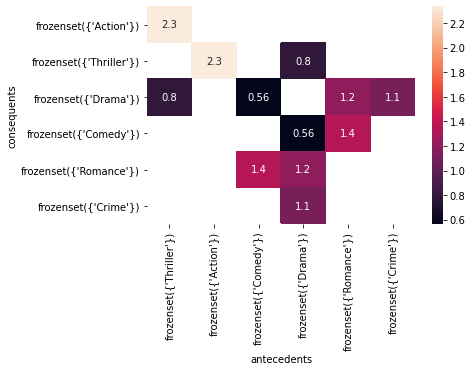

In [ ]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Transform the DataFrame of rules into a matrix using the lift metric
pivot_support = rules_support.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_support, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

#### Generating all the association rules

Criteria: minimum confidence value of 0.5

In [ ]:
# Compute all association rules for frequent_itemsets using confidence metric
rules_confidence = association_rules(frequent_itemsets, 
                                      metric = "confidence", 
                         	            min_threshold = 0.5)

# Preview of the frequent itemsets
rules_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Animation),(Children),0.027634,0.066277,0.022467,0.813008,12.266777,0.020635,4.993387
1,(Crime),(Drama),0.097506,0.481690,0.052123,0.534562,1.109765,0.005155,1.113598
2,(Film-Noir),(Crime),0.012581,0.097506,0.006515,0.517857,5.311019,0.005289,1.871839
3,(Romance),(Drama),0.166030,0.481690,0.096608,0.581867,1.207972,0.016633,1.239584
4,(War),(Drama),0.037295,0.481690,0.025837,0.692771,1.438211,0.007872,1.687050
5,(Mystery),(Thriller),0.047405,0.161312,0.026286,0.554502,3.437451,0.018639,1.882587


#### Visualizing the association rule using Heatmap

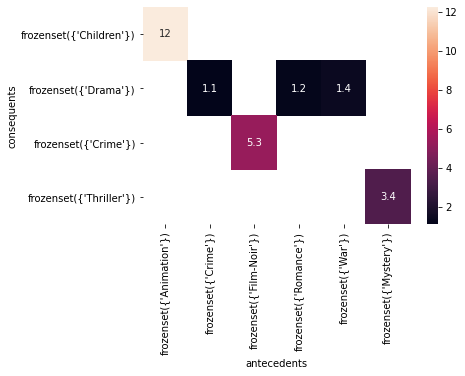

In [ ]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot_confidence = rules_confidence.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_confidence, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### EXERCISE 2

Generating the association rules and visualizing using Heatmap.
1. Show all the association rules using "frequent_itemsets" that has a **minimum lift value of 8.0**.
2. Create a heatmap to analyse and share your findings with everyone!

### ANSWERS TO EXERCISE 2

In [ ]:
# Compute all association rules for frequent_itemsets using lift metric
rules_lift = association_rules(frequent_itemsets, 
                                metric = "lift", 
                         	      min_threshold = 8.0)

# Preview of the frequent itemsets
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Animation),(Children),0.027634,0.066277,0.022467,0.813008,12.266777,0.020635,4.993387
1,(Children),(Animation),0.066277,0.027634,0.022467,0.338983,12.266777,0.020635,1.471015
2,(Musical),(Animation),0.036172,0.027634,0.009661,0.267081,9.664849,0.008661,1.326702
3,(Animation),(Musical),0.027634,0.036172,0.009661,0.349593,9.664849,0.008661,1.481886


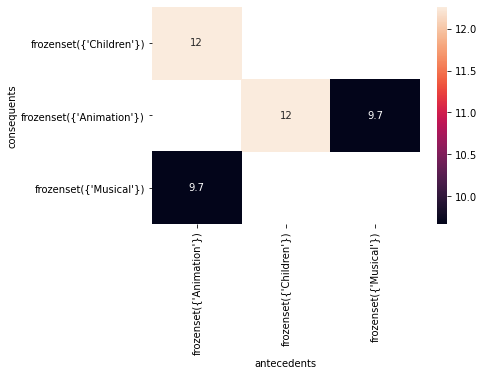

In [ ]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot_lift = rules_lift.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_lift, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### Applying more filters/criterias to fulfill

In [ ]:
# Apply the Apriori algorithm with a minimum support threshold of 0.001
frequent_itemsets = apriori(movies, min_support = 0.001, use_colnames = True)

# Recover association rules using a minium support threshold of 0.001
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)

# Apply a 0.02 antecedent support threshold, 0.01 consequent support threshold, 0.60 confidence threshold, and 2.50 lift threshold
filtered_rules = rules[(rules['antecedent support'] > 0.02) & 
                       (rules['consequent support'] > 0.01) & 
                       (rules['confidence'] > 0.60) & 
                       (rules['lift'] > 2.50)]

# Print remaining rule
filtered_rules[['antecedents','consequents']]

,antecedents,consequents
58,(Animation),(Children)


# THE END!!!